<center> <h1> PSI3431 - Experiência 2 - Processos Estocásticos </h1> </center> <br> 
    
 Nome | NUSP 
 :--------------: | :--------------: 
 Bruno Mucha Pasini | 10845791 
 Pedro Henrique Gianjoppe dos Santos | 10774055 
 Caio Hudson Queiroz de Souza | 10773885 

In [1]:
 import Pkg; Pkg.add("Plots")
 import Pkg; Pkg.add("WAV")
 import Pkg; Pkg.add("DSP")
 import Pkg; Pkg.add("Statistics")
 import Pkg; Pkg.add("LaTeXStrings")
 using Plots
 using Statistics
 using WAV
 using DSP
 using LaTeXStrings
plotlyjs();

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-5243937108049258437\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-11666187526817954105\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-5243937108049258437\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

# Item 1)
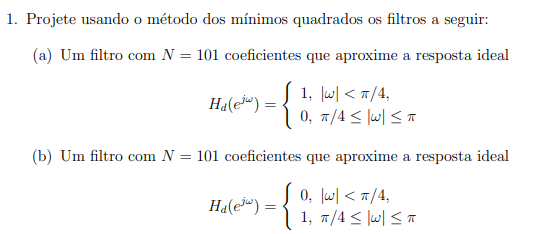

### a) Filtro passa-baixas com frequência de corte $w_{c} = \pi / 4$ e ganho 1

A anti-transformada de Fourier em Tempo Discreto irá fornecer a expressão do filtro ideal em função de n, dada por:

$h_{d}[n] = (w_{c}/\pi)*sinc((w_{c}/\pi)*n)$

Assim, temos $h_{d}[n] = (pi/4/pi)*sinc((pi/4/pi)*n) = (1/4)*sinc(n/4)$

Portanto, pelo critérios dos mínimos quadrados, o filtro realizável que melhor aproxima é:

$h[n] = h_{d}[n - L].p_{n}[n]$ , sendo $L = (N-1)/2$ para N ímpar e truncado em N = 101 coeficientes


In [13]:
N = 101

n = 0:N-1

#L = N/2 se N é par

L = (N-1)/2 #se N é impar

ωc = π/4

h1a = ωc/π * sinc.(ωc/π * (n .- L) )

plot(n, h1a, line = :stem, xlabel = "n", ylabel = "h1a[n]", label = "h1a[n]"; marker = (:circle, 3))


<!DOCTYPE html>
 
 
 Plots.jl

In [23]:
#Resposta em frequência do filtro H1a(e^jw)

w = range(0 , pi, length = 2500)
h1af = PolynomialRatio(h1a , [1])
H1a = freqz(h1af, w)

p1 = plot(w/pi, abs.(H1a), xlabel = "w/pi", ylabel = "|H1a(e^jw)|", label = "|H1a(e^jw)|")

p2 = plot(w/pi,  unwrap(angle.(H1a))*180/pi, xlabel = "w/pi", ylabel = "/_H1a(e^jw)", label = "/_H1a(e^jw)", line = :magenta)

plot(p1, p2, layout = (2,1))

<!DOCTYPE html>
 
 
 Plots.jl

### b) Filtro passa-altas com frequência de corte $w_{c} = \pi / 4$ e ganho 1

A anti-transformada de Fourier em Tempo Discreto irá fornecer a expressão do filtro ideal em função de n, dada por:

$H_{PA}(e^{jw})= 1 - H_{PB}(e^{jw}) $


$h_{d}[n] = \delta[n] - h_{PB}[n] = (w_{c}/\pi)*sinc((w_{c}/\pi)*n) $

Portanto, pelo critérios dos mínimos quadrados, o filtro realizável que melhor aproxima é:

$h[n] = h_{d}[n - L].p_{n}[n]$ , sendo $L = (N-1)/2$ para N ímpar e truncado em N = 101 coeficientes


In [57]:
N = 101

n = 0:N-1

#L = N/2 se N é par

L = Int((N-1)/2) #se N é impar

ωc = π/4

#Resposta em frequência do delta[n - L]

hdelta = zeros(N)

hdelta[L+1] = 1

p1 = plot(n, hdelta, line = :stem, xlabel = "n", ylabel = "hdelta[n]", label = "hdelta[n]"; marker = (:circle, 3))

w = range(0 , pi, length = 200)

hdeltaf = PolynomialRatio(hdelta , [1])

Hdelta = freqz(hdeltaf, w)

p2 = plot(w/pi, abs.(Hdelta), xlabel = "w/pi", ylabel = "|Hdelta(e^jw)|", label = "|Hdelta(e^jw)|")

p3 = plot(w/pi,  unwrap(angle.(Hdelta))*180/pi, xlabel = "w/pi", ylabel = "/_Hdelta(e^jw)", label = "/_Hdelta(e^jw)", line = :magenta)

plot(p1, p2,  p3, layout = (3,1))

<!DOCTYPE html>
 
 
 Plots.jl

In [61]:
#Resposta em frequência do filtro H2a(e^jw)

h1b = hdelta - h1a

p1 = plot(n, h1b, line = :stem, xlabel = "n", ylabel = "h1b[n]", label = "h1b[n]"; marker = (:circle, 3))

w = range(0 , pi, length = 200)

h1bf = PolynomialRatio(h1b , [1])

H1b = freqz(h1bf, w)

p2 = plot(w/pi, abs.(H1b), xlabel = "w/pi", ylabel = "|H1b(e^jw)|", label = "|H1b(e^jw)|")

p3 = plot(w/pi,  unwrap(angle.(H1b))*180/pi, xlabel = "w/pi", ylabel = "/_H1b(e^jw)", label = "/_H1b(e^jw)", line = :magenta)

plot(p1, p2,  p3, layout = (3,1))

<!DOCTYPE html>
 
 
 Plots.jl